<a href="https://colab.research.google.com/github/ronanmccormack-ca/Transfer-Learning-VGG16/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# example of tending the vgg16 model
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

In [6]:
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(224, 224, 3))

# Setting the existing layers to non-train
for layer in model.layers:
  layer.trainable = False
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(256, activation='relu')(flat1)
output = Dense(43, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()

58900480/58889256 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [7]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Data/New_Train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                  seed=42)

Found 8630 images belonging to 43 classes.


In [8]:
valid_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 
valid_generator = valid_datagen.flow_from_directory("/content/drive/MyDrive/Data/New_Valid/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42)

Found 430 images belonging to 43 classes.


In [9]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
history = model.fit(x=train_generator,
                    validation_data=valid_generator,
                              epochs=15)

Epoch 1/20
270/270 [==============================] - 29s 105ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.2025 - val_accuracy: 0.9721
Epoch 2/20
270/270 [==============================] - 31s 116ms/step - loss: 0.0279 - accuracy: 0.9915 - val_loss: 0.3065 - val_accuracy: 0.9302
Epoch 3/20
270/270 [==============================] - 28s 104ms/step - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.4338 - val_accuracy: 0.8977
Epoch 4/20
270/270 [==============================] - 27s 99ms/step - loss: 0.0289 - accuracy: 0.9915 - val_loss: 0.2716 - val_accuracy: 0.9349
Epoch 5/20
270/270 [==============================] - 25s 91ms/step - loss: 0.0051 - accuracy: 0.9980 - val_loss: 0.3058 - val_accuracy: 0.9349
Epoch 6/20
270/270 [==============================] - 24s 90ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.2543 - val_accuracy: 0.9419
Epoch 7/20
270/270 [==============================] - 24s 90ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.1798 - val_accura

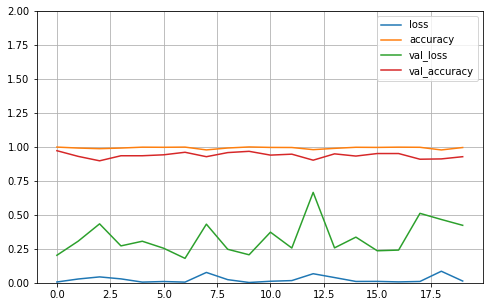

In [37]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Data/Test.csv')
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [13]:
test_df = pd.DataFrame()
for img in os.listdir('/content/drive/MyDrive/Data/Test_Main/Test'):
  result = df[df['Path']=='Test/'+img]
  test_df = pd.concat((test_df,result))
test_df = test_df.reset_index(drop=True)

In [18]:
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,73,69,6,6,67,63,29,Test/10710.png
1,40,44,6,6,35,39,8,Test/12562.png
2,37,37,6,5,31,32,1,Test/11961.png
3,38,36,5,5,33,31,18,Test/10477.png
4,42,39,6,5,37,34,30,Test/11709.png


In [36]:
from sklearn.metrics import accuracy_score
test_labels = test_df["ClassId"].values
test_images = test_df["Path"].values
test_path = '/content/drive/MyDrive/Data/Test_Main/'

output = list()
for img in test_images[0:26]:
    image = load_img(os.path.join(test_path, img), target_size=(224, 224))
    output.append(np.array(image))

In [40]:
X_test=np.array(output)
pred = model.predict(X_test)

In [31]:
pred_int = list()
for x in pred:
  pred_int.append(np.argmax(x))
pred_int = np.array([pred_int])
pred_int = pred_int.flatten()

In [38]:
from keras.utils import np_utils
np_utils.to_categorical(test_labels, num_classes=43)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
print('Test Data accuracy: ',accuracy_score(test_labels[0:26], pred_int.flatten())*100)

Test Data accuracy:  0.0


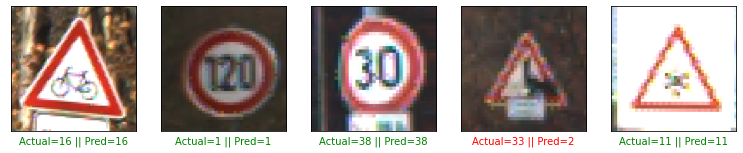

In [90]:
plt.figure(figsize = (13, 13))
start_index = 0
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred_results[start_index + i]
    actual = test_classes[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [45]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 
test_generator = test_datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/Data/Test_Main",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 7631 images belonging to 1 classes.


In [46]:
pred = model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [49]:
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

In [53]:
df = pd.read_csv('/content/drive/MyDrive/Data/Test.csv')

In [54]:
df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [62]:
test_df = test_df.sort_values(by='Path').reset_index(drop=True)
results['Predictions'] = results['Predictions'].astype(int)
test_classes = [x for x in test_df['ClassId']]
test_classes = np.array([test_classes]).flatten()
pred_results = [x for x in results['Predictions']]
pred_results = np.array([pred_results]).flatten()

In [86]:
print('Test Data accuracy: ',accuracy_score(test_classes, pred_results)*100)

Test Data accuracy:  74.13183069060412


In [ ]:
model.save('/content/drive/MyDrive/Data')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Data/assets
